# SENTIMENT ANALYSIS OF COMMODITY NEWS (GOLD)

Sentiment analysis of commodity news (gold) involves applying machine learning and natural language processing techniques to analyse the emotional undertone of news stories or other texts pertinent to the gold commodities market. Sentiment analysis examines the words and phrases in the text to ascertain the readers' attitudes towards a specific topic, in this case gold.

IMPORT THE REQUIRED LIBRARIES

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

LOAD THE DATASET

In [163]:
df=pd.read_csv('gold-dataset.csv')
df.head()

,Dates,URL,News,Price_Direction_Up,Price_Direction_Constant,Price_Direction_Down,Asset_Comparision,Past_Information,Future_Information,Price_Sentiment
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative


ANALYSE THE DATASET

In [164]:
df.shape

(10570, 10)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10570 entries, 0 to 10569
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Dates                     10570 non-null  object
 1   URL                       10570 non-null  object
 2   News                      10570 non-null  object
 3   Price_Direction_Up        10570 non-null  int64 
 4   Price_Direction_Constant  10570 non-null  int64 
 5   Price_Direction_Down      10570 non-null  int64 
 6   Asset_Comparision         10570 non-null  int64 
 7   Past_Information          10570 non-null  int64 
 8   Future_Information        10570 non-null  int64 
 9   Price_Sentiment           10570 non-null  object
dtypes: int64(6), object(4)
memory usage: 825.9+ KB


In [166]:
df.describe()

,Price_Direction_Up,Price_Direction_Constant,Price_Direction_Down,Asset_Comparision,Past_Information,Future_Information
count,10570.000000,10570.000000,10570.000000,10570.000000,10570.000000,10570.00000
mean,0.417408,0.042006,0.370104,0.189309,0.969915,0.03018
std,0.493155,0.200612,0.482855,0.391773,0.170830,0.17109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


HANDLING MISSING VALUES AND CHECKING NULL

In [167]:
df.isnull().sum()

Dates                       0
URL                         0
News                        0
Price_Direction_Up          0
Price_Direction_Constant    0
Price_Direction_Down        0
Asset_Comparision           0
Past_Information            0
Future_Information          0
Price_Sentiment             0
dtype: int64

In [168]:
#Add the new column which gives a unique number to each of these labels 
df['label_num'] = df['Price_Sentiment'].map({'neutral' : 0, 'negative': 1, 'positive': 2,'none':3})

#check the results with top 5 rows
df.head(5)

,Dates,URL,News,Price_Direction_Up,Price_Direction_Constant,Price_Direction_Down,Asset_Comparision,Past_Information,Future_Information,Price_Sentiment,label_num
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative,1
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative,1
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive,2
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none,3
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative,1


DROP UNWANTED COL

In [169]:
columns_to_drop = ['Dates', 'URL']  # List the column names you want to drop
df = df.drop(columns=columns_to_drop)


# Save the updated DataFrame to a new CSV file
df.to_csv('GOLD.csv', index=False)

HANDLING CATEGORICAL VALUES

In [170]:
df['Price_Sentiment'].value_counts()

positive    4412
negative    3814
none        1968
neutral      376
Name: Price_Sentiment, dtype: int64

INDEPENDENT AND DEPENDENT VARIABLES

In [171]:
# Select the independent variables (features)
indep = df[['Price_Direction_Up','Price_Direction_Constant','Price_Direction_Down',
'Asset_Comparision','Past_Information','Future_Information','News']]

# Select the dependent variable (target)
depen = df['Price_Sentiment']

# Display the independent variables
print(indep.head())

# Display the dependent variable
print(depen.head())

   Price_Direction_Up  Price_Direction_Constant  Price_Direction_Down  \
0                   0                         0                     1   
1                   0                         0                     1   
2                   1                         0                     0   
3                   0                         0                     0   
4                   0                         0                     1   

   Asset_Comparision  Past_Information  Future_Information  \
0                  0                 1                   0   
1                  0                 1                   0   
2                  0                 1                   0   
3                  0                 0                   1   
4                  0                 1                   0   

                                                News  
0  april gold down 20 cents to settle at $1,116.1...  
1          gold suffers third straight daily decline  
2     Gold futures edge

VISUAL REPRESENTATION

In [172]:
##visualization

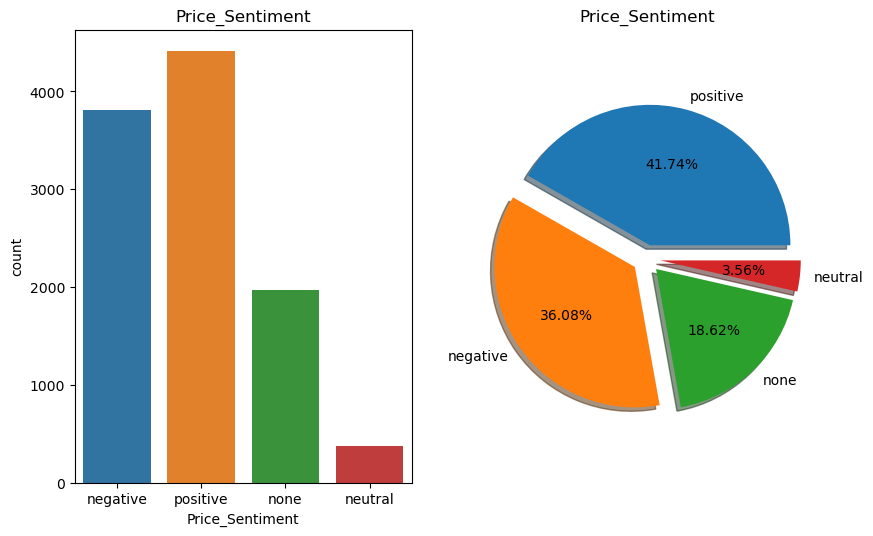

In [173]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 4, 1)
sns.countplot(data=df, x='Price_Sentiment')
plt.title('Price_Sentiment')

plt.subplot(3, 4, 2)
price_sentiment_counts = df['Price_Sentiment'].value_counts()
explode = [0.1, 0.1, 0.1, 0.1]
plt.pie(price_sentiment_counts, explode=explode, autopct='%0.2f%%', shadow=True, labels=price_sentiment_counts.index)
plt.title('Price_Sentiment')
plt.axis('equal')

plt.show()

UNIVARIENT ANALYSIS

1    10252
0      318
Name: Past_Information, dtype: int64

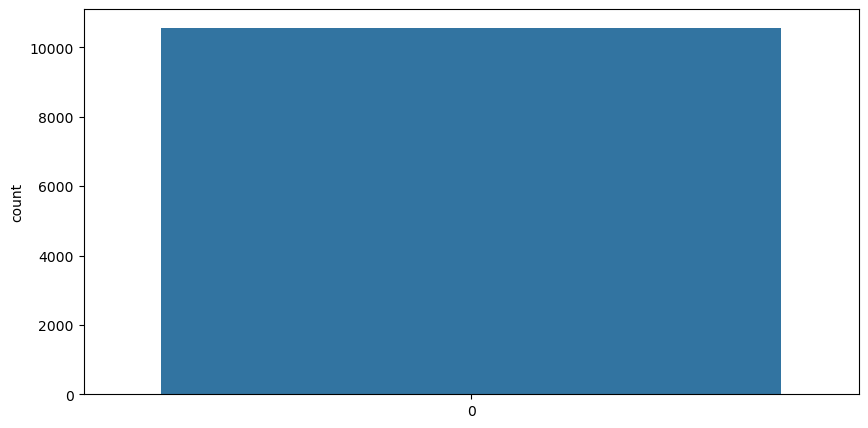

In [174]:
plt.figure(figsize=(10,5))
sns.countplot(df['Past_Information'])
df['Past_Information'].value_counts()


count    10570.000000
mean         0.969915
std          0.170830
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Past_Information, dtype: float64


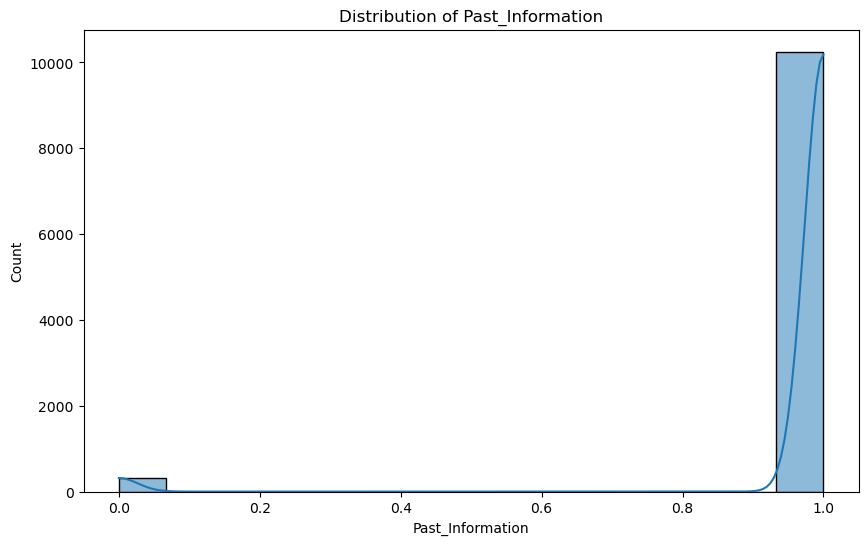

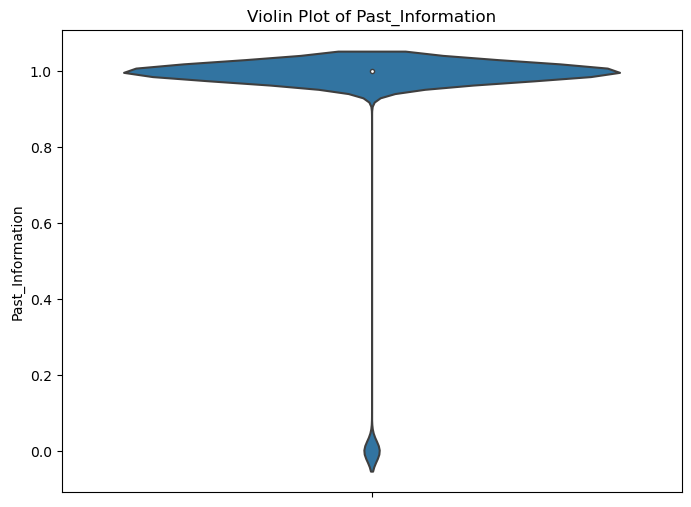

In [175]:
#Univariate analysis
variable = 'Past_Information'
print(df[variable].describe())
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=variable, kde=True)
plt.title('Distribution of ' + variable)
plt.show()
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, y=variable)
plt.title('Violin Plot of ' + variable)
plt.show()

BIVARIANT ANALYSIS

<Axes: xlabel='Price_Sentiment', ylabel='Past_Information'>

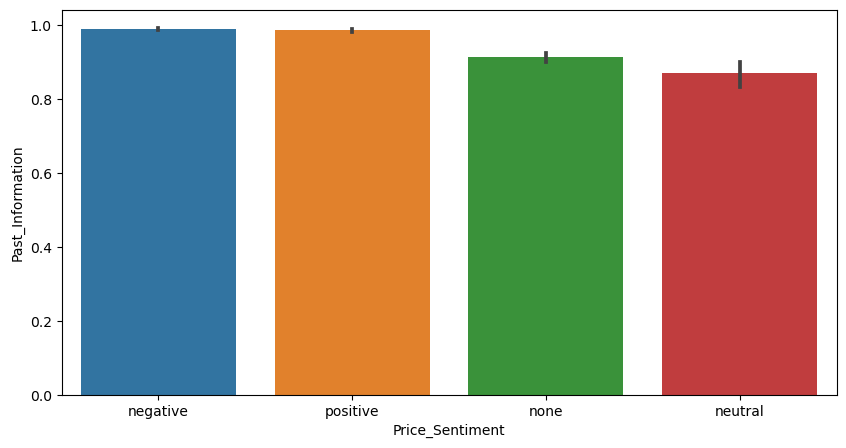

In [176]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Price_Sentiment'], y=df['Past_Information'])

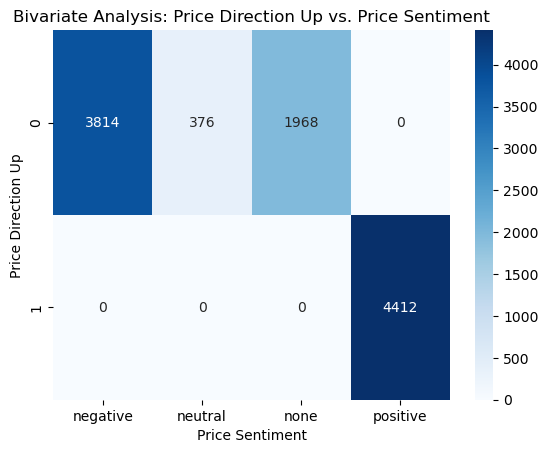

In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('gold-dataset.csv')

# Select the columns of interest
columns_of_interest = ['Price_Direction_Up', 'Price_Sentiment']

# Create a subset of the data with the selected columns
subset = df[columns_of_interest]

# Calculate the cross-tabulation or contingency table
cross_tab = pd.crosstab(subset['Price_Direction_Up'], subset['Price_Sentiment'])

# Plot a heatmap of the cross-tabulation
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')

# Set the plot title and labels
plt.title('Bivariate Analysis: Price Direction Up vs. Price Sentiment')
plt.xlabel('Price Sentiment')
plt.ylabel('Price Direction Up')

# Show the plot
plt.show()


MULTIVARIATE ANALYSIS

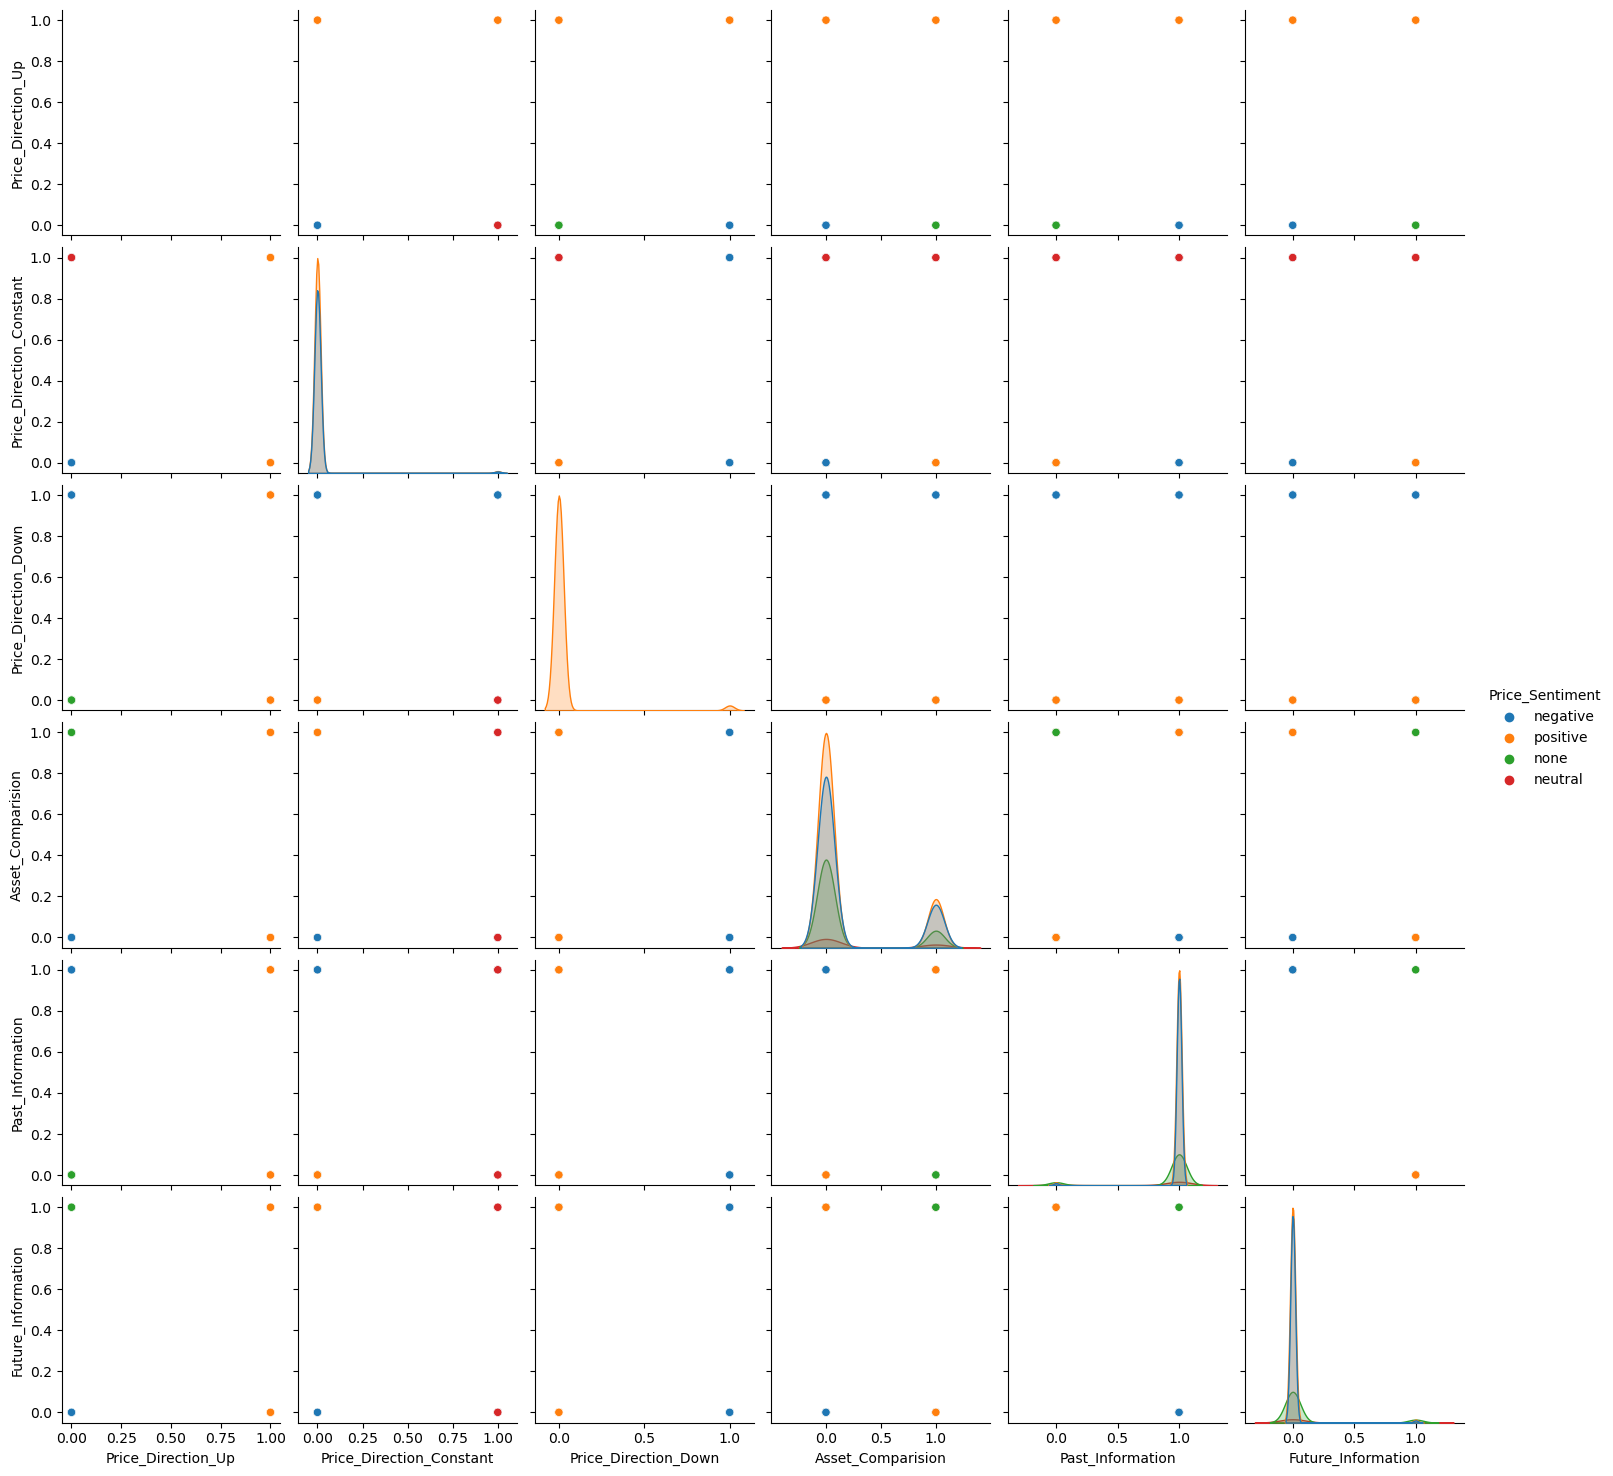

In [178]:
sns.pairplot(df,hue='Price_Sentiment')

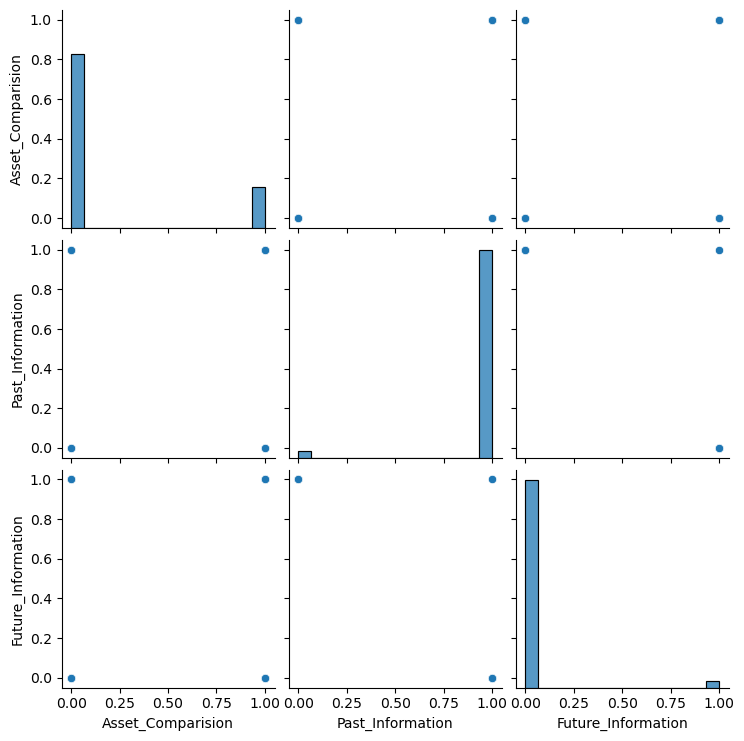

                    Asset_Comparision  Past_Information  Future_Information
Asset_Comparision            1.000000          0.005938           -0.006196
Past_Information             0.005938          1.000000           -0.998383
Future_Information          -0.006196         -0.998383            1.000000


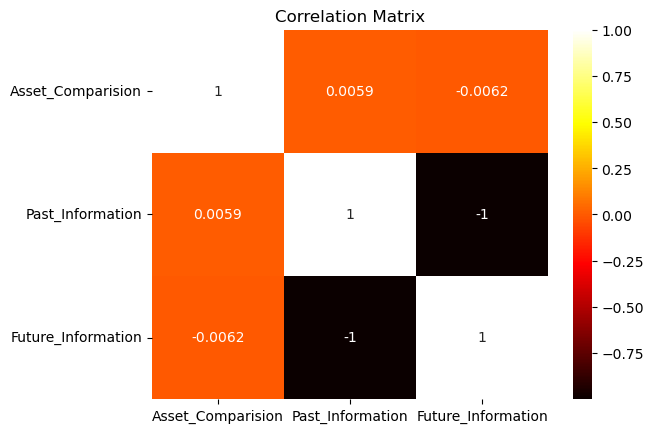

In [179]:
#Multivariate analysis
variables = ['Asset_Comparision','Past_Information','Future_Information']
sns.pairplot(df[variables])
plt.show()
correlation_matrix = df[variables].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='hot')
plt.title('Correlation Matrix')
plt.show()

TEXT PREPROCESSING

In [180]:
#text preprocessing with the news given 

In [181]:
#preprocessing
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for word in r:
        input_txt=re.sub(word," ",input_txt)
    return input_txt


In [182]:
#removal of characters and numbers 
df['new_News']=df['News'].str.replace("[^a-zA-z]"," ")
df.head()


,Dates,URL,News,Price_Direction_Up,Price_Direction_Constant,Price_Direction_Down,Asset_Comparision,Past_Information,Future_Information,Price_Sentiment,new_News
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative,april gold down cents to settle at ...
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative,gold suffers third straight daily decline
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive,Gold futures edge up after two session decline
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none,dent research is gold s day in the sun comin...
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative,Gold snaps three day rally as Trump lawmakers...


In [183]:
#removal of short words
df['new_News']=df['new_News'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,Dates,URL,News,Price_Direction_Up,Price_Direction_Constant,Price_Direction_Down,Asset_Comparision,Past_Information,Future_Information,Price_Sentiment,new_News
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative,april gold down cents settle
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative,gold suffers third straight daily decline
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive,Gold futures edge after session decline
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none,dent research gold coming soon
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative,Gold snaps three rally Trump lawmakers reach d...


In [184]:
# individual words considered as tokens
token_news = df['new_News'].apply(lambda x: x.split())
token_news.head()

0                   [april, gold, down, cents, settle]
1     [gold, suffers, third, straight, daily, decline]
2       [Gold, futures, edge, after, session, decline]
3                 [dent, research, gold, coming, soon]
4    [Gold, snaps, three, rally, Trump, lawmakers, ...
Name: new_News, dtype: object

In [185]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

token_news = token_news.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
token_news.head()

0                     [april, gold, down, cent, settl]
1       [gold, suffer, third, straight, daili, declin]
2           [gold, futur, edg, after, session, declin]
3                   [dent, research, gold, come, soon]
4    [gold, snap, three, ralli, trump, lawmak, reac...
Name: new_News, dtype: object

In [186]:
for i in range(len(token_news)):
    token_news[i] = " ".join(token_news[i])
    
df['new_News'] = token_news
df.head()

,Dates,URL,News,Price_Direction_Up,Price_Direction_Constant,Price_Direction_Down,Asset_Comparision,Past_Information,Future_Information,Price_Sentiment,new_News
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative,april gold down cent settl
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative,gold suffer third straight daili declin
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive,gold futur edg after session declin
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none,dent research gold come soon
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative,gold snap three ralli trump lawmak reach debt ...


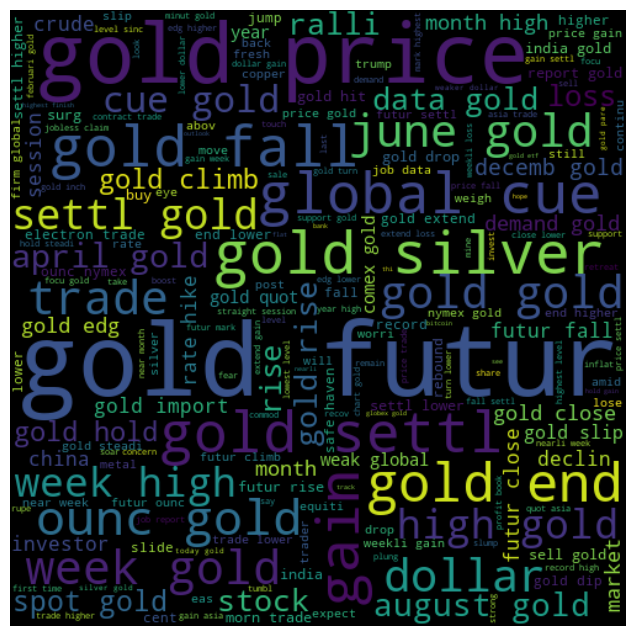

In [187]:
## exploratory data
all_words = " ".join([sentence for sentence in df['new_News']])
from wordcloud import WordCloud
wordcloud=WordCloud(width=500,height=500,random_state=45,max_font_size=100).generate(all_words)


#graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

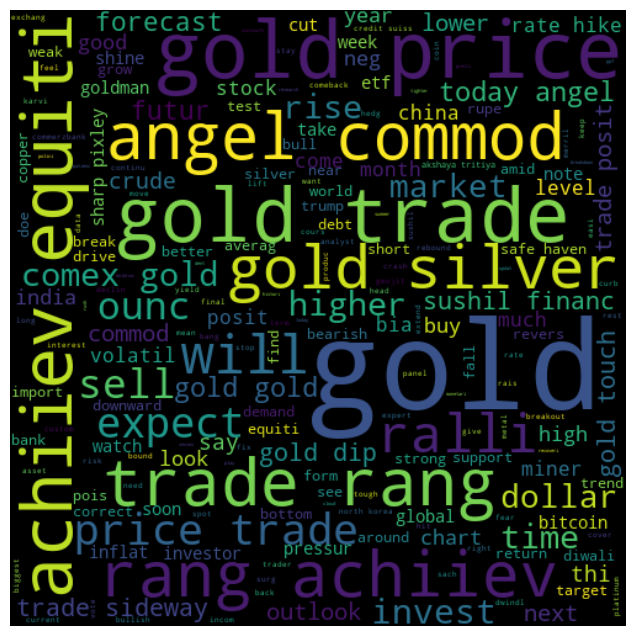

In [188]:
#fequent visualization
all_words = " ".join([sentence for sentence in df['new_News'][df['Past_Information']==0]])

wordcloud=WordCloud(width=500,height=500,random_state=45,max_font_size=100).generate(all_words)


#graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

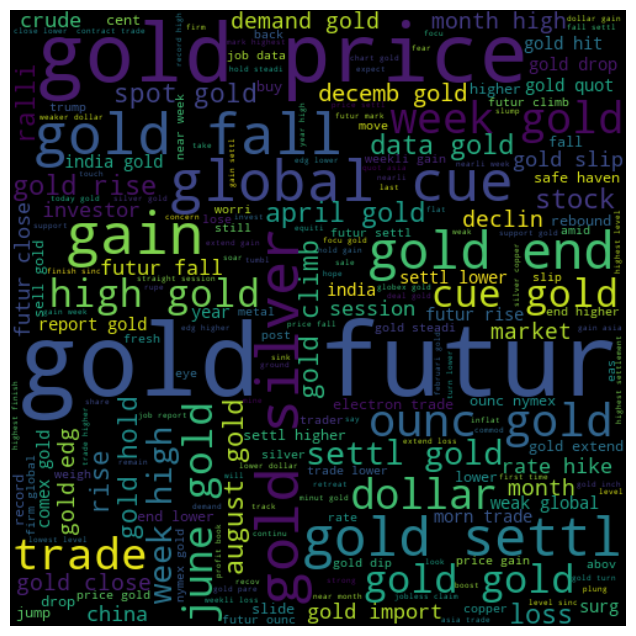

In [189]:
#negative 
#fequent visualization
all_words = " ".join([sentence for sentence in df['new_News'][df['Past_Information']==1]])

wordcloud=WordCloud(width=500,height=500,random_state=45,max_font_size=100).generate(all_words)


#graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

EXTRACTION OF THE POSITIVE AND NEGATIVE WORDS

In [190]:
import re

def key_pos_extract(newss):
    keywords = []
    # Loop through sentences in the news
    for news in newss:
        # Find the specific words in each sentence
        words = re.findall(r"\b(gain|high|export|higher|level)\b", news, flags=re.IGNORECASE)
        keywords.extend(words)
    return keywords


def key_neg_extract(newss):
    keywords = []
    # Loop through sentences in the news
    for news in newss:
        # Find the specific words in each sentence
        words = re.findall(r"\b(import|loss|close|lower|weak|slip|dip)\b", news, flags=re.IGNORECASE)
        keywords.extend(words)
    return keywords

In [191]:
pos_news =key_pos_extract(df['new_News'][df['Past_Information'] == 1])
neg_news = key_neg_extract(df['new_News'][df['Past_Information'] == 0])


In [192]:
pos_news[:4]


['gain', 'gain', 'gain', 'high']

In [193]:
neg_news[:4]

['lower', 'loss', 'lower', 'dip']

In [194]:
pos_news = sum([pos_news], [])
neg_news = sum([neg_news], [])


In [195]:
neg_news[:5]

['lower', 'loss', 'lower', 'dip', 'dip']

VISUALIZATION OF THE POSITIVE AND NEGATIVE WORDS

In [196]:
#pos word count
freq = nltk.FreqDist(pos_news)
d = pd.DataFrame({'Word': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Word,Count
0,gain,1053
1,high,664
2,higher,620
3,level,197
4,export,18


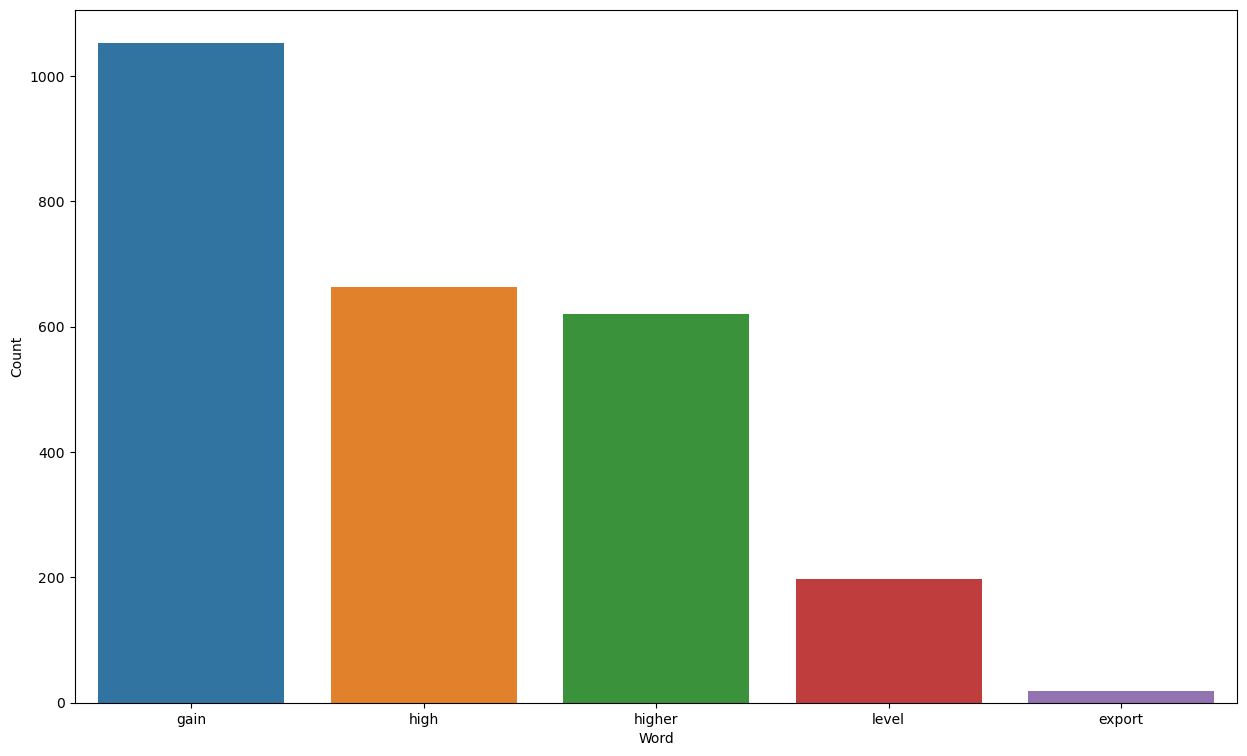

In [197]:
#positive visualization
import seaborn as sns
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Word', y='Count')
plt.show()

In [198]:
##negative words count
freq = nltk.FreqDist(neg_news)
d = pd.DataFrame({'Word': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Word,Count
0,lower,8
1,loss,1
2,dip,9
3,weak,3
4,import,3


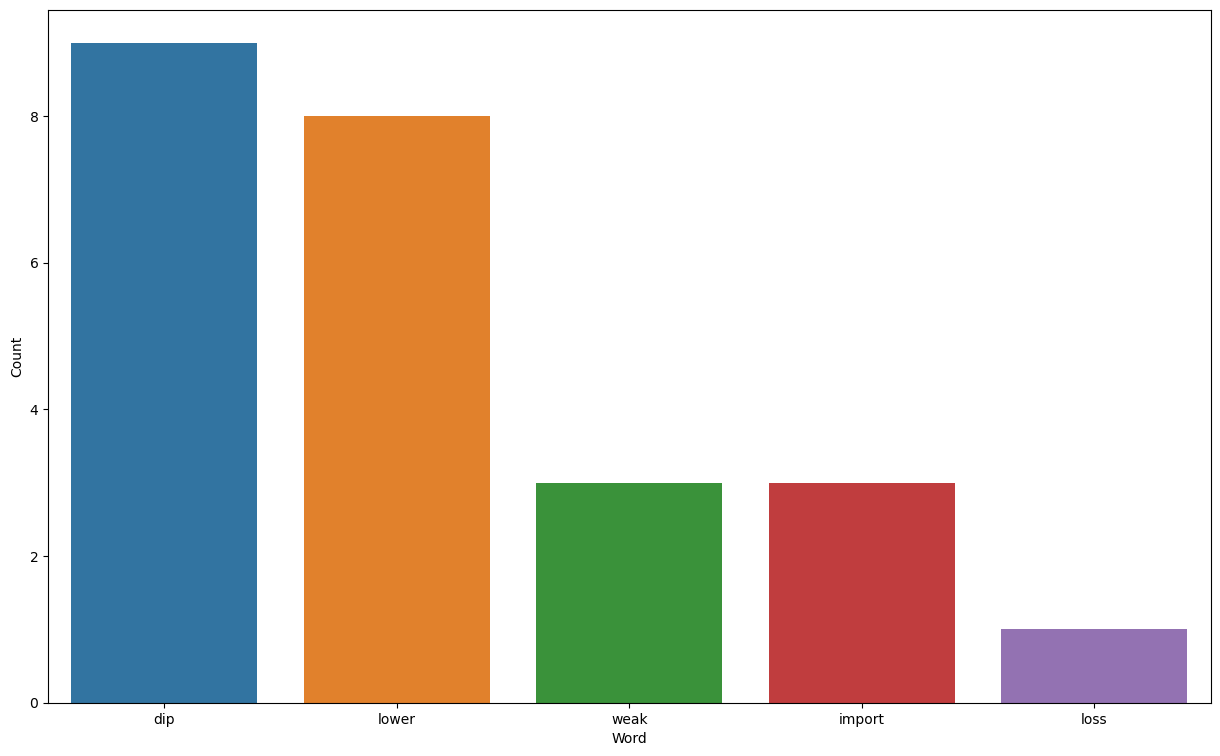

In [199]:
# neg visualization
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Word', y='Count')
plt.show()

SPLITTING DATA INTO TRAIN AND TEST

In [200]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['new_News'])

In [201]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['Past_Information'], random_state=42, test_size=0.25)

In [202]:
x_train

<7927x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 33016 stored elements in Compressed Sparse Row format>

In [203]:
y_train

9114    1
7495    1
6817    1
7376    1
7856    1
       ..
5734    1
5191    1
5390    1
860     0
7270    1
Name: Past_Information, Length: 7927, dtype: int64

MODEL BUILDING

In [204]:
#model training

In [205]:
#Decision tree

              precision    recall  f1-score   support

           0       0.22      0.36      0.27        70
           1       0.98      0.97      0.97      2573

    accuracy                           0.95      2643
   macro avg       0.60      0.66      0.62      2643
weighted avg       0.96      0.95      0.96      2643



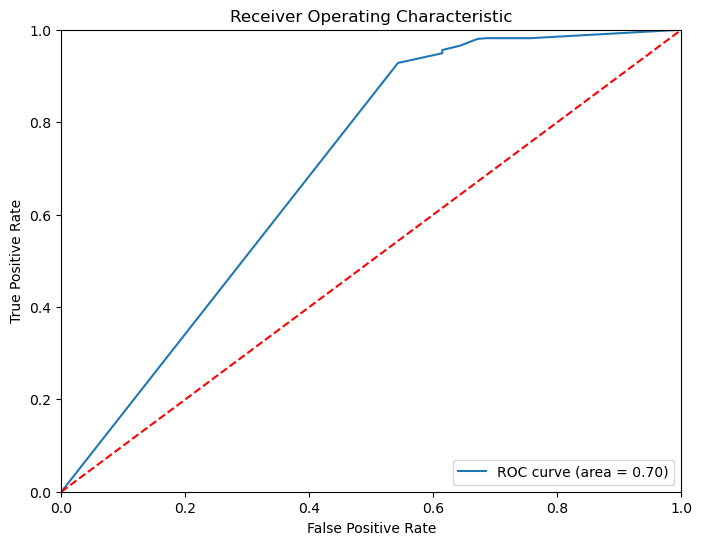

In [206]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Training
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

# Testing
pred = model_dt.predict(x_test)
f1_score_value = f1_score(y_test, pred)
accuracy_score_value = accuracy_score(y_test, pred)

# Use probability to get output
pred_prob = model_dt.predict_proba(x_test)[:, 1]

# Calculate FPR, TPR, and threshold for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, pred_prob)

# Calculate error rate
error_rate = 1 - accuracy_score_value
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [207]:
print("accuracy score for decision tree ---> " ,accuracy_score_value)

accuracy score for decision tree --->  0.9493000378357926


In [208]:
print("Error Rate for decision tree---->", error_rate)

Error Rate for decision tree----> 0.05069996216420736


In [209]:
#random forest

              precision    recall  f1-score   support

           0       0.51      0.31      0.39        70
           1       0.98      0.99      0.99      2573

    accuracy                           0.97      2643
   macro avg       0.75      0.65      0.69      2643
weighted avg       0.97      0.97      0.97      2643



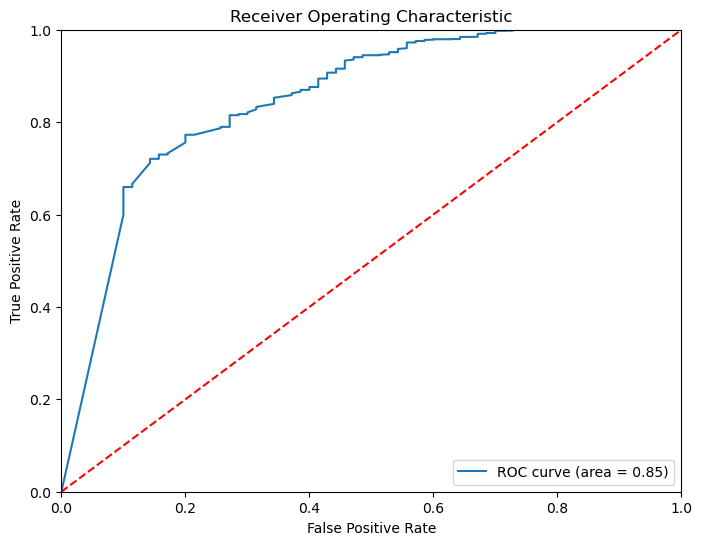

In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Training
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

# Testing
pred = model_rf.predict(x_test)
f1_score_value = f1_score(y_test, pred)
accuracy_score_value = accuracy_score(y_test, pred)

# Use probability to get output
pred_prob = model_rf.predict_proba(x_test)[:, 1]

# Calculate FPR, TPR, and threshold for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, pred_prob)

# Calculate error rate
error_rate = 1 - accuracy_score_value
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [211]:
print("accuracy score for random forest ---> " ,accuracy_score_value)

accuracy score for random forest --->  0.9738933030646992


In [212]:
print("accuracy score for random forest ---> " ,accuracy_score_value)

accuracy score for random forest --->  0.9738933030646992


In [213]:
#Navie bayes

              precision    recall  f1-score   support

           0       0.07      0.51      0.13        70
           1       0.98      0.82      0.90      2573

    accuracy                           0.81      2643
   macro avg       0.53      0.67      0.51      2643
weighted avg       0.96      0.81      0.88      2643



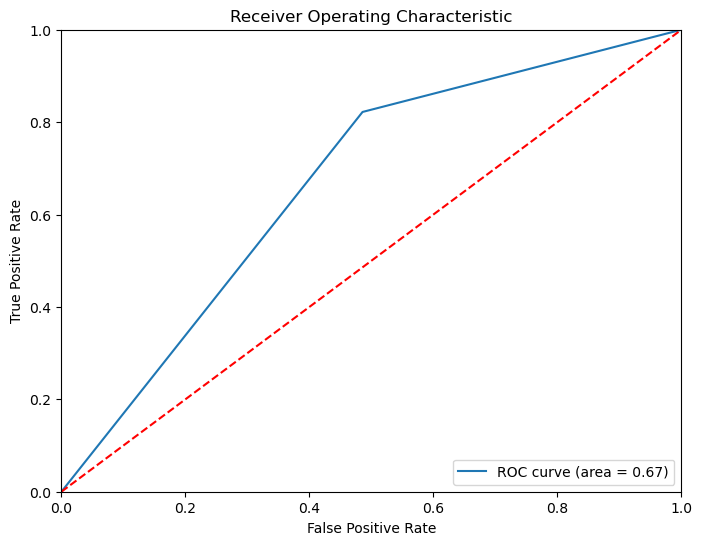

In [144]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Convert sparse matrix to dense array
x_train_dense = x_train.toarray()
x_test_dense = x_test.toarray()

# Training
model_nb = GaussianNB()
model_nb.fit(x_train_dense, y_train)

# Use probability to get output
pred_prob = model_nb.predict_proba(x_test_dense)[:, 1]

# Calculate FPR, TPR, and threshold for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, pred_prob)

# Testing
pred = model_nb.predict(x_test_dense)
f1_score_value = f1_score(y_test, pred)
accuracy_score_value = accuracy_score(y_test, pred)

# Calculate error rate
error_rate = 1 - accuracy_score_value

from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [145]:
print("accuracy score for navie bayes----> " ,accuracy_score_value)

accuracy score for navie bayes---->  0.8138479001135074


In [146]:
print("Error Rate for navie bayes--->", error_rate)

Error Rate for navie bayes---> 0.18615209988649262


In [147]:
#k-Nearest Neighbors (KNN) classifier

              precision    recall  f1-score   support

           0       0.59      0.23      0.33        70
           1       0.98      1.00      0.99      2573

    accuracy                           0.98      2643
   macro avg       0.79      0.61      0.66      2643
weighted avg       0.97      0.98      0.97      2643



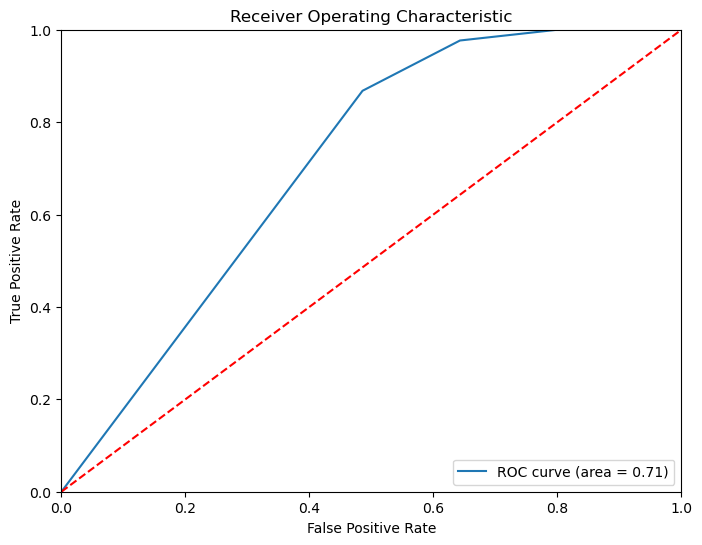

In [148]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score,roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Training
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)

# Testing
pred = model_knn.predict(x_test)
f1_score_value = f1_score(y_test, pred)
accuracy_score_value = accuracy_score(y_test, pred)
# Use probability to get output
pred_prob = model_knn.predict_proba(x_test)[:, 1]

# Calculate FPR, TPR, and threshold for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, pred_prob)

# Calculate error rate
error_rate = 1 - accuracy_score_value

from sklearn.metrics import classification_report
print(classification_report(y_test, pred))
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [149]:
print("accuracy score for k-Nearest Neighbors (KNN) classifier----> " ,accuracy_score_value)

accuracy score for k-Nearest Neighbors (KNN) classifier---->  0.9754067347710934


In [150]:
print("Error Rate for k-Nearest Neighbors (KNN) classifier------>:", error_rate)

Error Rate for k-Nearest Neighbors (KNN) classifier------>: 0.02459326522890659


PIPELINE FOR MODEL DECISION TREE AND RANDOM FOREST

In [151]:
##pipeline

In [152]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Create a pipeline with the decision tree classifier
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  # Add your vectorizer (e.g., CountVectorizer) as the first step
    ('classifier', DecisionTreeClassifier())  # Add the decision tree classifier as the second step
])

# Preprocess X_train to handle sequences
X_train_processed = [' '.join(map(str, item)) if isinstance(item, (list, tuple)) else str(item) for item in x_train]

# Convert X_train_processed to a numpy array
X_train_processed = np.array(X_train_processed)

# Fit the pipeline to the training data
pipeline.fit(X_train_processed, y_train)


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', DecisionTreeClassifier())])

In [153]:
##model building for random forest

In [154]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Create a pipeline with the random forest classifier
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  # Add your vectorizer (e.g., CountVectorizer) as the first step
    ('classifier', RandomForestClassifier())  # Add the random forest classifier as the second step
])

# Preprocess X_train to handle sequences
X_train_processed = [' '.join(map(str, item)) if isinstance(item, (list, tuple)) else str(item) for item in x_train]

# Convert X_train_processed to a numpy array
X_train_processed = np.array(X_train_processed)

# Fit the pipeline to the training data
pipeline.fit(X_train_processed, y_train)


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', RandomForestClassifier())])

HYPER PARAMETER TUNING

In [157]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Read the dataset
df = pd.read_csv('GOLD.csv')

# Separate the features and target variable
X = df.drop(['label_num','News','Price_Sentiment'], axis=1)
y = df['Past_Information']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
rf = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy Score:  1.0
Test Accuracy:  1.0


MODEL DEPLOYMENT USING PICKLE

In [51]:
#model deployment


In [132]:
### Create a Pickle file using serialization, Random forest model is used.
import pickle
pickle_out = open("ran_for.pkl","wb")
pickle.dump(model_ran, pickle_out)
pickle_out.close()